In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px
import seaborn as sns

In [2]:
# Load datasets
country_results_df = pd.read_csv('data/country_results_df.csv')

In [3]:
# Since few countries participated before 1980, this analyse is limited to data from 1980 onwards
country_results_df = country_results_df[country_results_df['year'] >= 1980]

In [4]:
# Print out some first data lines
country_results_df.head(5)

,year,country,team_size_all,team_size_male,team_size_female,p1,p2,p3,p4,p5,p6,p7,awards_gold,awards_silver,awards_bronze,awards_honorable_mentions,leader,deputy_leader
0,2024,United States of America,6,5.0,1.0,42.0,41.0,19.0,40.0,35.0,15.0,NaN,5.0,1.0,0.0,0.0,John Berman,Carl Schildkraut
1,2024,People's Republic of China,6,6.0,0.0,42.0,42.0,31.0,40.0,22.0,13.0,NaN,5.0,1.0,0.0,0.0,Liang Xiao,Yijun Yao
2,2024,Republic of Korea,6,6.0,0.0,42.0,37.0,18.0,42.0,7.0,22.0,NaN,2.0,4.0,0.0,0.0,Suyoung Choi,Hwajong Yoo
3,2024,India,6,6.0,0.0,42.0,34.0,11.0,42.0,28.0,10.0,NaN,4.0,1.0,0.0,1.0,Krishnan Sivasubramanian,Rijul Saini
4,2024,Belarus,6,6.0,0.0,42.0,30.0,10.0,42.0,36.0,5.0,NaN,4.0,0.0,2.0,0.0,David Zmiaikou,Dzmitry Bazyleu


In [5]:
# Preprocess data
# If information on `team_size_male` and `team_size_female` in unavailable, it's assumed that all team members are male.
country_results_df['team_size_male'].fillna(country_results_df['team_size_all'])
country_results_df['team_size_female'].fillna(country_results_df['team_size_all'] - country_results_df['team_size_male'], inplace=True)

C:\Users\G301\AppData\Local\Temp\ipykernel_4004\2555564256.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  country_results_df['team_size_female'].fillna(country_results_df['team_size_all'] - country_results_df['team_size_male'], inplace=True)


In [6]:
# Aggregate gender participation and total score
gender_participation = country_results_df.groupby('year').agg(
    {'team_size_male': 'sum', 'team_size_female': 'sum', 'team_size_all': 'sum'}).reset_index()

# Calculate percentage of female participation
gender_participation['female_percentage'] = (
    gender_participation['team_size_female'] /
    (gender_participation['team_size_male'] + gender_participation['team_size_female']) * 100
)

gender_participation['num_countries'] = country_results_df.groupby('year').size().values

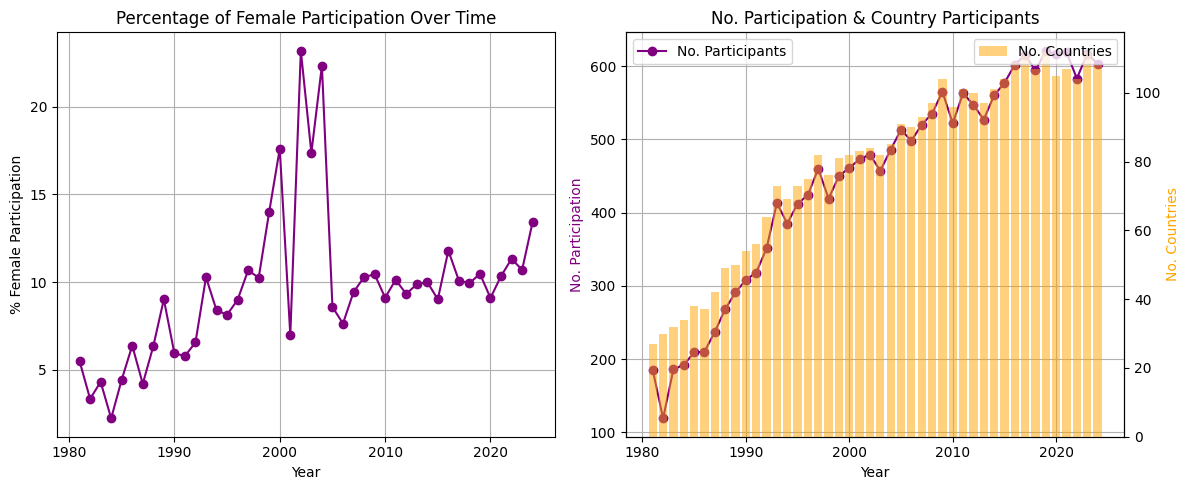

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the percentage of female participation
axes[0].plot(gender_participation['year'], gender_participation['female_percentage'], marker='o', color='purple')
axes[0].set_title("Percentage of Female Participation Over Time")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("% Female Participation")
axes[0].grid(True)

# Plot the number of female participants with an additional bar chart for country participants
ax2 = axes[1].twinx()  # Create a secondary y-axis

# Line plot for female participants
axes[1].plot(gender_participation['year'], gender_participation['team_size_all'], marker='o', color='purple', label="No. Participants")

# Bar chart for number of countries
ax2.bar(gender_participation['year'], gender_participation['num_countries'], alpha=0.5, color='orange', label="No. Countries")

# Titles and labels
axes[1].set_title("No. Participation & Country Participants")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("No. Participation", color='purple')
ax2.set_ylabel("No. Countries", color='orange')

# Grid and legend
axes[1].grid(True)
axes[1].legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [8]:
# Calculate female participation rate
country_results_df['female_rate'] = country_results_df['team_size_female'] / country_results_df['team_size_all']

# Compute country performance
country_results_df['score'] = (
    country_results_df['awards_gold'] * 3 +
    country_results_df['awards_silver'] * 2 +
    country_results_df['awards_bronze'] * 1
)

# Avoid division by zero
country_results_df['score_female_ratio'] = (country_results_df['score'] /  country_results_df['team_size_female'])
country_results_df.loc[country_results_df['team_size_female'] == 0, 'score_female_ratio'] = 0

In [9]:
# Print top countries' performance
top_countries = country_results_df.groupby('country')['score'].sum().nlargest(10)
top_countries.head(10)

country
United States of America      650.0
People's Republic of China    635.0
Romania                       519.0
Vietnam                       490.0
Republic of Korea             479.0
Bulgaria                      474.0
Hungary                       470.0
Russian Federation            454.0
Germany                       452.0
Islamic Republic of Iran      429.0
Name: score, dtype: float64

In [10]:
# Print top countries with a high rate of female participantion
top_female = country_results_df.groupby('country')['score_female_ratio'].sum().nlargest(10)
top_female.head(10)

country
Hungary                       181.000000
United Kingdom                144.000000
Bulgaria                      143.500000
People's Republic of China    136.000000
Romania                       134.000000
Republic of Korea             129.500000
Russian Federation            129.500000
Australia                     125.750000
Canada                        123.500000
Ukraine                       112.916667
Name: score_female_ratio, dtype: float64

C:\Users\G301\AppData\Local\Temp\ipykernel_4004\3615241730.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


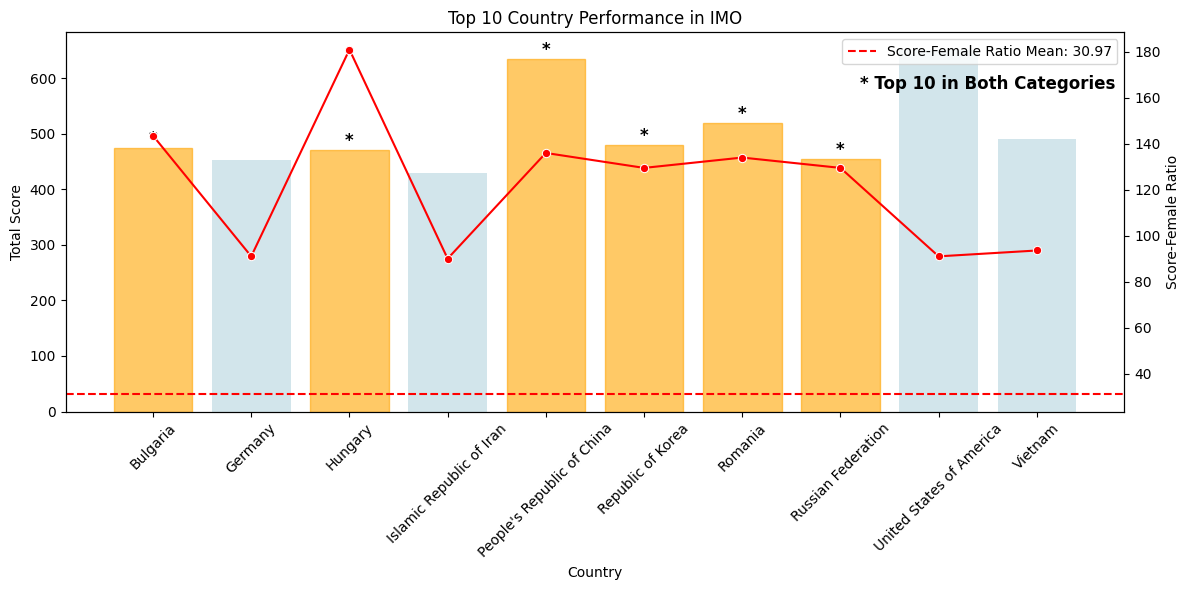

In [11]:
# Get top 10 performing countries
top_countries = country_results_df.groupby('country')['score'].sum().nlargest(10)
top_female = country_results_df.groupby('country')['score_female_ratio'].sum().nlargest(10)

# Highlight countries appearing in both top lists
highlight_countries = top_countries.index.intersection(top_female.index)

# Prepare data for visualization
top_10_df = country_results_df.groupby('country')[['score', 'score_female_ratio']].sum().reset_index()
top_10_df = top_10_df[top_10_df['country'].isin(top_countries.index)]

# Compute mean score_female_ratio
top_female_mean = country_results_df.groupby('country')['score_female_ratio'].sum().mean()

# Plot country performance
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total score
bars = sns.barplot(data=top_10_df, x='country', y='score', ax=ax1, color='lightblue', alpha=0.6)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel("Country")
ax1.set_ylabel("Total Score")
ax1.set_title("Top 10 Country Performance in IMO")

# Highlight specific bars and add labels
for bar, country in zip(bars.patches, top_10_df['country']):
    if country in highlight_countries:
        bar.set_color('orange')
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '*', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Secondary y-axis for score_female_ratio
ax2 = ax1.twinx()
sns.lineplot(data=top_10_df, x='country', y='score_female_ratio', marker='o', ax=ax2, color='red')
ax2.axhline(y=top_female_mean, color='red', linestyle='--', label=f'Score-Female Ratio Mean: {top_female_mean:.2f}')
ax2.legend()
ax2.set_ylabel("Score-Female Ratio")

# Add legend for highlighted countries
ax1.text(0.75, 0.85, "* Top 10 in Both Categories", transform=ax1.transAxes, fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# Dash App Setup
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("IMO Country Performance Analysis"),
    
    dcc.Dropdown(
        id='country-selector',
        options=[{'label': c, 'value': c} for c in country_results_df['country'].unique()],
        multi=False,
        placeholder="Select a country..."
    ),
    dcc.Graph(id='country-performance-chart'),
    
    html.H2("Score-Female Ratio by Country"),
    dcc.Graph(id='female-rate-overview')
])

@app.callback(
    Output('country-performance-chart', 'figure'),
    [Input('country-selector', 'value')]
)
def update_country_performance_chart(selected_country):
    if not selected_country:
        return px.line(title="Select a country to display data")

    filtered_df = country_results_df[country_results_df['country'] == selected_country]
    
    fig = px.line(filtered_df, x='year', y='score', markers=True,
                  title=f"Performance Over Time: {selected_country}",
                  labels={'score': 'Performance Score', 'year': 'Year'})
    return fig

@app.callback(
    Output('female-rate-overview', 'figure'),
    [Input('country-selector', 'value')]
)
def update_female_rate_overview(selected_country):
    filtered_df = country_results_df[country_results_df['country'] == selected_country]
    fig = px.bar(filtered_df, x='year', y='score_female_ratio',
                 title="Score-Female Ratio by Country overtime",
                 labels={'score_female_ratio': 'Score-Female Ratio', 'country': 'Country'})
    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8051)

---
End of question 1